# Sortify

The goal is to automatically pre-sort the playlists I regularly create for the Rock 4 Temps club parties I'm part of.

Main objectives:
* Play first the most known musics
* Alternate slow and fast music

Secondary objectives:
* Display a histogram of bpm, ideally the majority should be close to 120 (for this type of dance)
* Display the "Title - Artist" list to easily generate the PDF for the evening.

## Get tracks

In [307]:
import os

import spotipy
from spotipy.oauth2 import SpotifyOAuth

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [308]:
c_id = os.environ['c_id']
c_secret = os.environ['c_secret']

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=c_id,
                                               client_secret=c_secret,
                                               redirect_uri="https://127.0.0.1",
                                               scope="""
                                               playlist-read-private playlist-modify-private playlist-modify-public 
                                               playlist-read-collaborative user-library-modify"""))

In [309]:
results = sp.current_user_playlists(limit=50)

In [310]:
# Find playlist_id

playlist_id = "4FNN7270AruT0qJqpOq4dw"

if not playlist_id:
    for playlist in results['items']:
        print(playlist['name'], playlist['id'])

In [311]:
playlist_tracks = sp.user_playlist_tracks(playlist_id=playlist_id)

In [312]:
print(playlist_tracks['items'][0].keys())
print(playlist_tracks['items'][0]['track'].keys())
print(playlist_tracks['items'][0]['track']['album'].keys())

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])
dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])
dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])


In [313]:
def playlist_tracks_to_df(playlist_tracks):
    tracks = []
    for track in playlist_tracks['items']:
        t = track['track']
        features = sp.audio_analysis(t['id'])
        track = {
            'id': t['id'],
            'name': t['name'],
            'artist': ', '.join([artist['name'] for artist in t['artists']]),
            'duration_ms': t['duration_ms'],
            'explicit': t['explicit'],
            'release_date': t['album']['release_date'],
            'popularity': t['popularity'],
        }

        tracks.append(track)
    df = pd.DataFrame(tracks)
    return df

df = playlist_tracks_to_df(playlist_tracks)
df

,id,name,artist,duration_ms,explicit,release_date,popularity
0,0e8nrvls4Qqv5Rfa2UhqmO,THATS WHAT I WANT,Lil Nas X,143901,True,2021-09-17,93
1,7BKLCZ1jbUBVqRi2FVlTVw,Closer,"The Chainsmokers, Halsey",244960,False,2016-07-29,86
2,5PjdY0CKGZdEuoNab3yDmX,STAY (with Justin Bieber),"The Kid LAROI, Justin Bieber",141805,True,2021-07-23,92
3,4n7jnSxVLd8QioibtTDBDq,On My Way,"Alan Walker, Sabrina Carpenter, Farruko",193797,True,2019-03-21,77
4,1rqqCSm0Qe4I9rUvWncaom,High Hopes,Panic! At The Disco,190946,False,2018-06-22,83
5,0Uon5NsSAkBDx69XYOaQ5P,Stay,Gracie Abrams,177152,False,2019-11-21,71
6,2sX7lJXsOYGP1Us6CqM9t1,Little Bit of Love,Tom Grennan,226268,False,2021-01-08,75
7,3n2P3ipLt5mPFVaM0fJHNR,Wrap Me In Plastic - Marcus Layton Radio Edit,"CHROMANCE, Marcus Layton",193320,False,2019-11-15,68
8,7weX6syqklVQocpVVmDNwI,Love Back,Why Don't We,185850,False,2021-10-06,73
9,4U7G8dgUodMEVSv96QRcDb,No Friends,"Cadmium, Rosendale",235023,False,2020-03-06,68


## Get audio features

In [314]:
features = pd.DataFrame(sp.audio_features(tracks=df['id']))
for col in ['energy', 'mode', 'tempo']:
    df[col] = features[col]
df

,id,name,artist,duration_ms,explicit,release_date,popularity,energy,mode,tempo
0,0e8nrvls4Qqv5Rfa2UhqmO,THATS WHAT I WANT,Lil Nas X,143901,True,2021-09-17,93,0.846,0,87.981
1,7BKLCZ1jbUBVqRi2FVlTVw,Closer,"The Chainsmokers, Halsey",244960,False,2016-07-29,86,0.524,1,95.010
2,5PjdY0CKGZdEuoNab3yDmX,STAY (with Justin Bieber),"The Kid LAROI, Justin Bieber",141805,True,2021-07-23,92,0.764,1,169.928
3,4n7jnSxVLd8QioibtTDBDq,On My Way,"Alan Walker, Sabrina Carpenter, Farruko",193797,True,2019-03-21,77,0.689,0,170.087
4,1rqqCSm0Qe4I9rUvWncaom,High Hopes,Panic! At The Disco,190946,False,2018-06-22,83,0.904,1,82.014
5,0Uon5NsSAkBDx69XYOaQ5P,Stay,Gracie Abrams,177152,False,2019-11-21,71,0.370,1,114.260
6,2sX7lJXsOYGP1Us6CqM9t1,Little Bit of Love,Tom Grennan,226268,False,2021-01-08,75,0.706,0,106.520
7,3n2P3ipLt5mPFVaM0fJHNR,Wrap Me In Plastic - Marcus Layton Radio Edit,"CHROMANCE, Marcus Layton",193320,False,2019-11-15,68,0.612,0,89.961
8,7weX6syqklVQocpVVmDNwI,Love Back,Why Don't We,185850,False,2021-10-06,73,0.744,1,105.882
9,4U7G8dgUodMEVSv96QRcDb,No Friends,"Cadmium, Rosendale",235023,False,2020-03-06,68,0.644,1,145.029


## Sort / Reindex

In [315]:
median_energy = np.median(df['energy'])

print(median_energy)

df = df.sort_values('popularity', ascending=False).reset_index(drop=True)

df_inf_median = df[df["energy"] < median_energy]
df_sup_median = df[df["energy"] >= median_energy]

print(df_inf_median.shape)
print(df_sup_median.shape)

0.706
(11, 10)
(12, 10)


In [316]:
ids_ordered = []

for id1, id2 in zip(df_sup_median['id'].values, df_inf_median['id'].values):
    ids_ordered.append(id1)
    ids_ordered.append(id2)

if df_inf_median.shape[0] > df_sup_median.shape[0]:
    ids_ordered.append(df_inf_median['id'].iloc[-1])
elif df_inf_median.shape[0] < df_sup_median.shape[0]:
    ids_ordered.append(df_sup_median['id'].iloc[-1])
    
print(ids_ordered)

['0e8nrvls4Qqv5Rfa2UhqmO', '7BKLCZ1jbUBVqRi2FVlTVw', '5PjdY0CKGZdEuoNab3yDmX', '4n7jnSxVLd8QioibtTDBDq', '1rqqCSm0Qe4I9rUvWncaom', '0Uon5NsSAkBDx69XYOaQ5P', '2sX7lJXsOYGP1Us6CqM9t1', '3n2P3ipLt5mPFVaM0fJHNR', '7weX6syqklVQocpVVmDNwI', '4U7G8dgUodMEVSv96QRcDb', '4keoy2fqgwGnbWlm3ZVZFa', '2SPEg45ZaUFJCg9GwNmRvw', '3wuR0YSNdT9rgWfFi1lctv', '5iDaEbPX8Lq2evx3ZpAgQU', '64UmuvjJk7CxLZB6pKTrsS', '5XGjHvW9kqp8QqFpMHmESt', '2LYAG9jlH9rul11nalRxR0', '4O5BcYOGpbutyUhwExTSYu', '3zJeRYExRbqUbuynS6X8ZO', '3B3LaCPJ0PJZzXhGh1Nkzv', '5EhXpH8kkPEay1UyjBPgzb', '3s8Zq2jGW1rIDKYme02J85', '4F1wRJpj3i83yf7FBTo1W7']


## Replace in Playlist

In [317]:
sp.playlist_replace_items(playlist_id, ids_ordered)

{'snapshot_id': 'MzMsYWE0ZTMxM2E2ZTA2YzY2OWQ0NTNjM2QzZDhkMGZkMDBjZWI2ZWE4Yg=='}

## See result & Generate PDF

In [318]:
result = df.set_index("id")
result = result.reindex(ids_ordered)
result

,name,artist,duration_ms,explicit,release_date,popularity,energy,mode,tempo
id,,,,,,,,,
0e8nrvls4Qqv5Rfa2UhqmO,THATS WHAT I WANT,Lil Nas X,143901,True,2021-09-17,93,0.846,0,87.981
7BKLCZ1jbUBVqRi2FVlTVw,Closer,"The Chainsmokers, Halsey",244960,False,2016-07-29,86,0.524,1,95.010
5PjdY0CKGZdEuoNab3yDmX,STAY (with Justin Bieber),"The Kid LAROI, Justin Bieber",141805,True,2021-07-23,92,0.764,1,169.928
4n7jnSxVLd8QioibtTDBDq,On My Way,"Alan Walker, Sabrina Carpenter, Farruko",193797,True,2019-03-21,77,0.689,0,170.087
1rqqCSm0Qe4I9rUvWncaom,High Hopes,Panic! At The Disco,190946,False,2018-06-22,83,0.904,1,82.014
0Uon5NsSAkBDx69XYOaQ5P,Stay,Gracie Abrams,177152,False,2019-11-21,71,0.370,1,114.260
2sX7lJXsOYGP1Us6CqM9t1,Little Bit of Love,Tom Grennan,226268,False,2021-01-08,75,0.706,0,106.520
3n2P3ipLt5mPFVaM0fJHNR,Wrap Me In Plastic - Marcus Layton Radio Edit,"CHROMANCE, Marcus Layton",193320,False,2019-11-15,68,0.612,0,89.961
7weX6syqklVQocpVVmDNwI,Love Back,Why Don't We,185850,False,2021-10-06,73,0.744,1,105.882


In [319]:
# For easy copy pasting :)

def display(values):
    print(values[0], "-", values[1])

_ = result[['name', 'artist']].apply(display, axis=1)

THATS WHAT I WANT - Lil Nas X
Closer - The Chainsmokers, Halsey
STAY (with Justin Bieber) - The Kid LAROI, Justin Bieber
On My Way - Alan Walker, Sabrina Carpenter, Farruko
High Hopes - Panic! At The Disco
Stay - Gracie Abrams
Little Bit of Love - Tom Grennan
Wrap Me In Plastic - Marcus Layton Radio Edit - CHROMANCE, Marcus Layton
Love Back - Why Don't We
No Friends - Cadmium, Rosendale
Happy Now - Zedd, Elley Duhé
None Of My Business - Cher Lloyd
Million Ways - HRVY
A Little Messed Up - june
Addict - Silva Hound, Michael Kovach, Chi-Chi
Weddings & Funerals - Royal & the Serpent
Killer - The Ready Set
Strange - Silent Child, margø
B.O.M.B. - emlyn
love is scary (feat. Emilia Ali) - dwilly, Emilia Ali
Oh My God - Gia Woods
Villain - Fokushi
Burn - Marnik, ROOKIES


# Statistics

In [320]:
print(f"{round(df[df['explicit']].shape[0] / df.shape[0] * 100, 2)}% of explicit songs")

21.74% of explicit songs


<AxesSubplot:>

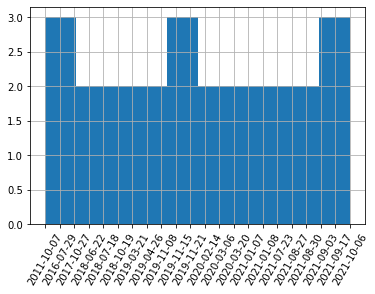

In [321]:
df['release_date'].sort_values().hist(xrot=60)

count     23.000000
mean     114.657000
std       28.054334
min       80.018000
25%       95.354000
50%      105.882000
75%      133.486000
max      170.087000
Name: tempo, dtype: float64


<AxesSubplot:>

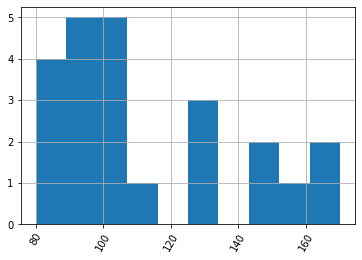

In [322]:
tempo = df['tempo'].sort_values()
print(tempo.describe())
tempo.hist(xrot=60)

<AxesSubplot:>

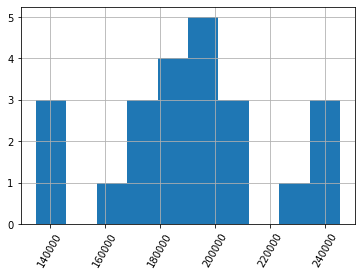

In [323]:
df['duration_ms'].sort_values().hist(xrot=60)

In [324]:
def to_min(x):
    sec = x / 1000
    minutes = int(sec // 60)
    secondes = int(sec % 60)
    return f"{minutes}:{secondes}"

df['duration_ms'].apply(to_min)

0     2:23
1     2:21
2      4:4
3     3:10
4     3:13
5     3:46
6      3:5
7     3:27
8     2:57
9     3:13
10    3:55
11     3:4
12    2:49
13    2:48
14     4:5
15     3:3
16    3:29
17    2:56
18    3:30
19    2:15
20     3:6
21    3:13
22    3:19
Name: duration_ms, dtype: object